In [1]:
include("continuous_hopfield.jl")
using .CH
using Plots

Take three patterns $\vec{\xi}_{1}$, $\vec{\xi}_{2}$ and $\vec{\xi}_{3}$. Those three patterns are points in the d-dimensional space and thus they define a plane. The goal is to obtain other points on the same plane and compute the energy for each of them. A new pattern can be found as: $$ \vec{\xi}_{new} = \vec{\xi}_{1} + \alpha_1 (\vec{\xi}_{2} - \vec{\xi}_{1}) + \alpha_2 (\vec{\xi}_{3} - \vec{\xi}_{1}),$$
where $$ 0 \leq \alpha_i \leq 1 $$

In [29]:
M = 10
N = 20
ξ = generate_patterns(M, N)
σ1, σ2, σ3 = ξ[:, 1], ξ[:, 2], ξ[:, 3]

([5, 3, 2, 4, 4, 4, 2, 5, 1, 1, 4, 4, 3, 5, 5, 4, 4, 4, 1, 1], [1, 2, 3, 4, 4, 1, 4, 2, 3, 5, 3, 3, 2, 2, 4, 3, 3, 5, 3, 2], [4, 5, 2, 4, 3, 3, 2, 1, 2, 5, 4, 5, 1, 3, 1, 5, 4, 4, 4, 5])

In [30]:
α1 = range(-2, 2, length = 300)
α2 = range(-2, 2, length = 300)

Z = zeros(length(α1), length(α2))

for i in 1:length(α1)
    a = α1[i]
    for j in 1:length(α2)
        σ_new = σ1 + a*(σ2 - σ1) + α2[j]*(σ3 -σ1)
        Z[i, j] = energy(σ_new, ξ, 1, 1)
    end
end

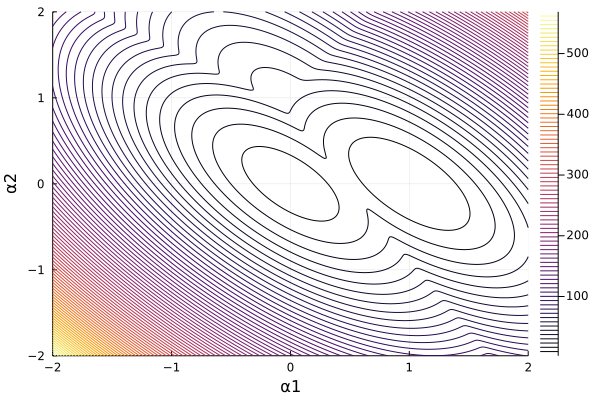

In [31]:
Plots.contour(α1, α2, Z, levels = 80, xlabel = "α1", ylabel = "α2")
